<a href="https://colab.research.google.com/github/ShafiraNurRohmah/FinalBigData/blob/master/Shafira_1800018224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALISA USIA YANG RENTAN TERKENA GANGGUAN KESEHATAN MENTAL**




NAMA : SHAFIRA NUR ROHMAH

NIM   : 1800018224

In [1]:
! apt-get install openjdk-8-jdk-headless -qq > /dev/null
! wget -q https://downloads.apache.org/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
! tar xf spark-2.4.6-bin-hadoop2.7.tgz
! pip install -q findspark
! pip install pyspark_dist_explore

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

**2. IMPORT LIBRARY SPARK YANG SUDAH TERINSTAL**

In [3]:
import findspark
findspark.init("spark-2.4.6-bin-hadoop2.7")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, avg
from matplotlib import pyplot as plt
from pyspark_dist_explore import Histogram, hist

**3. INISIALISASI SPARKCONTEXT DAN SPARKSESSION**

In [4]:
sc = spark.sparkContext
spark = SparkSession(sc)

**4. LOAD DATASET**

In [5]:
survey = spark.read.csv('Penyakit.csv', header=True, inferSchema=True)
survey.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- state: string (nullable = true)
 |-- self_employed: string (nullable = true)
 |-- familyhistory: string (nullable = true)
 |-- treatment: string (nullable = true)
 |-- work_interfere: string (nullable = true)
 |-- no_employees: string (nullable = true)
 |-- remote_work: string (nullable = true)
 |-- tech_company: string (nullable = true)
 |-- benefits: string (nullable = true)
 |-- care_options: string (nullable = true)
 |-- wellness_program: string (nullable = true)
 |-- seek_help: string (nullable = true)
 |-- anonymity: string (nullable = true)
 |-- leave: string (nullable = true)
 |-- mental_health_consequence: string (nullable = true)
 |-- phys_health_consequence: string (nullable = true)
 |-- coworkers: string (nullable = true)
 |-- supervisor: string (nullable = true)
 |-- mental_health_interview: string (nullable = t

**4. PROSES EDA**

In [6]:
print("Total Pasien Gangguan Kesehatan Mental : ", survey.count())

Total Pasien Gangguan Kesehatan Mental :  1259


melihat 5 data teratas

In [7]:
survey.show(5)

+---------------+---+------+--------------+-----+-------------+-------------+---------+--------------+--------------+-----------+------------+----------+------------+----------------+----------+----------+------------------+-------------------------+-----------------------+------------+----------+-----------------------+---------------------+------------------+---------------+--------+
|      Timestamp|Age|Gender|       Country|state|self_employed|familyhistory|treatment|work_interfere|  no_employees|remote_work|tech_company|  benefits|care_options|wellness_program| seek_help| anonymity|             leave|mental_health_consequence|phys_health_consequence|   coworkers|supervisor|mental_health_interview|phys_health_interview|mental_vs_physical|obs_consequence|comments|
+---------------+---+------+--------------+-----+-------------+-------------+---------+--------------+--------------+-----------+------------+----------+------------+----------------+----------+----------+-----------------

melihat statistik data pasien pada dataset

In [8]:
survey.describe().show()

+-------+--------------+------------------+------------------+---------+-----+-------------+-------------+---------+--------------+--------------+-----------+------------+----------+------------+----------------+----------+----------+----------+-------------------------+-----------------------+---------+----------+-----------------------+---------------------+------------------+---------------+--------------------+
|summary|     Timestamp|               Age|            Gender|  Country|state|self_employed|familyhistory|treatment|work_interfere|  no_employees|remote_work|tech_company|  benefits|care_options|wellness_program| seek_help| anonymity|     leave|mental_health_consequence|phys_health_consequence|coworkers|supervisor|mental_health_interview|phys_health_interview|mental_vs_physical|obs_consequence|            comments|
+-------+--------------+------------------+------------------+---------+-----+-------------+-------------+---------+--------------+--------------+-----------+----

persebaran data pada kolom

In [9]:
survey_age = survey.select('age')
# fig, axes = plt.subplots()
# fig.set_size_inches(5, 5)
# hist(axes, survey_age, bins=20, color="red")
# plt.show()

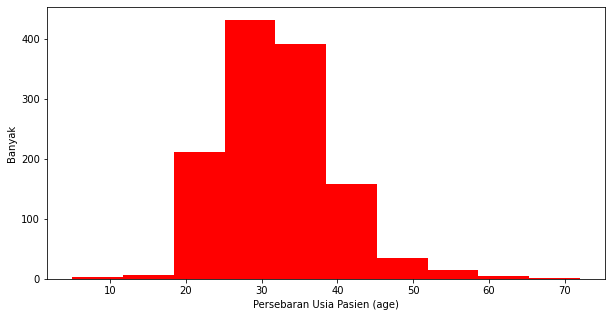

In [10]:
survey_age = survey.select('age')

fig, axes = plt.subplots()
fig.set_size_inches(10, 5)
hist(axes, survey_age, color="red")
plt.xlabel('Persebaran Usia Pasien (age)')
plt.ylabel('Banyak')

plt.show()

dari data diatas bisa dilihat hasilnya rata-rata usia yang rentan terkena gangguan kesehatan mental yaitu 25-38

mengecek data null

In [11]:
table = ['timestamp', 'age', 'gender', 'country', 'state', 'self_employed', 'familyhistory', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']

for colom in table:
  print('data yang bernilai null pada kolom ', colom, ' : ', survey.where(col(colom).isNull()).count())

data yang bernilai null pada kolom  timestamp  :  0
data yang bernilai null pada kolom  age  :  0
data yang bernilai null pada kolom  gender  :  0
data yang bernilai null pada kolom  country  :  0
data yang bernilai null pada kolom  state  :  0
data yang bernilai null pada kolom  self_employed  :  0
data yang bernilai null pada kolom  familyhistory  :  0
data yang bernilai null pada kolom  treatment  :  0
data yang bernilai null pada kolom  work_interfere  :  0
data yang bernilai null pada kolom  no_employees  :  0
data yang bernilai null pada kolom  remote_work  :  0
data yang bernilai null pada kolom  tech_company  :  0
data yang bernilai null pada kolom  benefits  :  0
data yang bernilai null pada kolom  care_options  :  0
data yang bernilai null pada kolom  wellness_program  :  0
data yang bernilai null pada kolom  seek_help  :  0
data yang bernilai null pada kolom  anonymity  :  0
data yang bernilai null pada kolom  leave  :  0
data yang bernilai null pada kolom  mental_health_con

**5. PRE PROCESSING**

In [12]:
# menyeleksi data
surveyDF = survey.select('age', 'familyhistory')

# menampilkan 10 data teratas
surveyDF.show(10)

+---+-------------+
|age|familyhistory|
+---+-------------+
| 37|           No|
| 44|           No|
| 32|           No|
| 31|          Yes|
| 31|           No|
| 33|          Yes|
| 35|          Yes|
| 39|           No|
| 42|          Yes|
| 23|           No|
+---+-------------+
only showing top 10 rows



**6. PEMROSESAN DATA**

In [27]:
# pada pemrosesan data ini menggunakan transformasi dan action pada spark dataframe

# seleksi data familyhistory
survey_familyhistory = surveyDF.filter(surveyDF.familyhistory == 'yes')

# hitung rata-rata usia pasien terkena gangguan kesehatan mental
rata_rata_usia_pasien = surveyDF.groupBy('familyhistory').avg('age')

# output
print("Jumlah pasien   : ", survey_age.count())

print('\n')

print('Perbandingan pasien terkena gangguan kesehatan mental')
rata_rata_usia_pasien.show()

# ambil data single value dari spark sql
rata_usia_f = rata_rata_usia_pasien.collect()[0][1]
rata_usia_m = rata_rata_usia_pasien.collect()[1][1]


Jumlah pasien   :  1259


Perbandingan pasien terkena gangguan kesehatan mental
+-------------+-----------------+
|familyhistory|         avg(age)|
+-------------+-----------------+
|           No|31.94263363754889|
|          Yes|32.10162601626016|
+-------------+-----------------+



dari data diatas bisa dilihat hasilnya dari pasien yang terkena gangguan kesehatan mental itu memang lebih banyak dari pasien yang memiliki riwayat keluarga sebelumnya sehingga bisa turun pada keturunan selanjutnya

**7. VISUALISASI DATA**

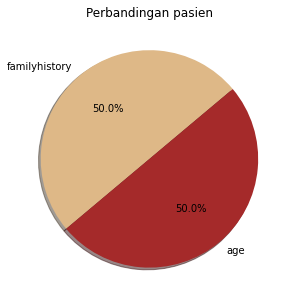

In [34]:
# plotting data
fig, axes = plt.subplots()

# jumlah pasien gangguan kesehatan mental
fig.set_size_inches(6, 5)

plt.title('Perbandingan pasien')
plt.pie([survey.count(), survey.count()], labels=['familyhistory', 'age'], autopct='%1.1f%%', shadow=True, startangle=40, colors=['#DEB887', 'brown'])
print('\n')

Jadi kesimpulannya usia yang rentan terkena gangguan kesehatan mental yaitu usia 25-38 dan yang memang mempunyai riwayat penyakit keluarga sebelumnya.